# Opening Weekend Analysis

## Introduction

A movie's first week at the box office has always been important in terms of marketing and drawing interest in the film. Especially superhero movies are no longer strangers to big numbers and full-on sellouts when it comes to opening weekend sales. In this assignment, I'd like to examine what affects the opening weekend sales of superhero movies and how much impact of opening weekend sales can give to total sales, and provide the suggestion of business strategy for movie companies based on the analysis.

## Load Data 

In [1]:
#import library 
import json

# open json file for mongodb user cridential

with open(f'Cridential1') as cridentials_file:
        cridentials = json.load(cridentials_file)
        mongo_conn_str = cridentials['mongodb']

In [2]:
import pymongo

#connect to the database and verify it's working. 

client = pymongo.MongoClient(mongo_conn_str)
db = client.DA320
serverStatusResult = db.command("serverStatus")
print(serverStatusResult)

{'host': 'cluster0-shard-00-02.pgrep.mongodb.net:27017', 'version': '5.0.8', 'process': 'mongod', 'pid': 53713, 'uptime': 1769904.0, 'uptimeMillis': 1769903927, 'uptimeEstimate': 1769903, 'localTime': datetime.datetime(2022, 5, 22, 4, 47, 44, 566000), 'asserts': {'regular': 0, 'warning': 0, 'msg': 0, 'user': 0, 'rollovers': 0}, 'connections': {'current': 6, 'available': 494, 'totalCreated': 60}, 'extra_info': {'note': 'fields vary by platform', 'page_faults': 0}, 'network': {'bytesIn': 1271561, 'bytesOut': 54498977, 'numRequests': 7180}, 'opcounters': {'insert': 2, 'query': 48, 'update': 0, 'delete': 0, 'getmore': 10, 'command': 7116, 'deprecated': {'query': 0, 'getmore': 0}}, 'opcountersRepl': {'insert': 0, 'query': 0, 'update': 0, 'delete': 0, 'getmore': 0, 'command': 0, 'deprecated': {'query': 0, 'getmore': 0}}, 'repl': {'topologyVersion': {'processId': ObjectId('626ebec056ebfa03921b648a'), 'counter': 6}, 'hosts': ['cluster0-shard-00-00.pgrep.mongodb.net:27017', 'cluster0-shard-00-0

In [3]:
import pandas as pd
# Retrieve data from MongoDB

cursor = db["imdb_metacritic"].find()

metacritic = pd.DataFrame(list(cursor))

cursor = db["superhero"].find()

movies = pd.DataFrame(list(cursor))

In [4]:
#import libraries for EDA and visualization
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## EDA

In [5]:
# disply the column labels

movies.columns

Index(['_id', 'ID', 'Title', 'Runtime', 'Rating', 'Votes', 'MPAARating',
       'ReleaseYear', 'ReleaseMonth', 'ReleaseDay', 'Budget', 'OpeningWeekend',
       'GrossSales', 'Genres', 'Cast1', 'Cast2', 'Cast3', 'Cast4', 'Cast5',
       'Cast6', 'Cast7', 'Cast8', 'Cast9', 'Cast10', 'Director1', 'Producer1',
       'Producer2', 'Producer3', 'Producer4', 'Producer5', 'Company1',
       'Company2', 'Company3', 'Director2', 'Company4', 'Company5',
       'Director3', 'Director4', 'Director5'],
      dtype='object')

### Variable Description
* ID : unique key of each movie
* Title : Movie title
* Runtime: Duration of movie
* Rating : movie score out of 10
* Votes : the number of votes that user casted on each movie
* MPAARAting : territories to rate a movie's suitability for certain audiences based on its content
* ReleaseYear: the year of release each movie
* ReleaseMonth: the month of release each movie
* ReleaseDay: the day of release each movie
* Budget : the cost to make a movie
* OpeningWeekend: collective gross of its first Friday, Saturday and Sunday
* GrossSlaes : gross earning of a movie
* Genres : movie category
* Cast : the actor/ actress name of a movie
* Director : the director's name of a movie
* Producer: the producer's name of a movie
* Company : the company's name of making a movie

In [6]:
# data types of each column

movies.dtypes

_id                object
ID                  int64
Title              object
Runtime           float64
Rating             object
Votes             float64
MPAARating         object
ReleaseYear         int64
ReleaseMonth        int64
ReleaseDay          int64
Budget            float64
OpeningWeekend    float64
GrossSales        float64
Genres             object
Cast1              object
Cast2              object
Cast3              object
Cast4              object
Cast5              object
Cast6              object
Cast7              object
Cast8              object
Cast9              object
Cast10             object
Director1          object
Producer1          object
Producer2          object
Producer3          object
Producer4          object
Producer5          object
Company1           object
Company2           object
Company3           object
Director2          object
Company4           object
Company5           object
Director3          object
Director4          object
Director5   

In [7]:
# desscriptive statistics for numerical values

movies.describe()

,ID,Runtime,Votes,ReleaseYear,ReleaseMonth,ReleaseDay,Budget,OpeningWeekend,GrossSales
count,4.840000e+02,448.000000,4.590000e+02,484.000000,484.000000,484.000000,2.840000e+02,1.670000e+02,1.500000e+02
mean,1.775352e+06,102.053571,1.104748e+05,2005.214876,6.626033,15.828512,9.266034e+07,4.768210e+07,4.007307e+08
std,2.198794e+06,25.958007,2.292722e+05,10.896051,3.345932,8.853859,3.235704e+08,5.634090e+07,4.195273e+08
min,7.747900e+04,30.000000,5.000000e+00,1978.000000,1.000000,1.000000,4.000000e+02,2.800000e+03,3.909100e+04
25%,3.032585e+05,87.000000,1.220000e+02,1997.000000,4.000000,8.000000,2.475000e+06,8.031790e+06,1.008038e+08
50%,8.543450e+05,98.000000,3.398000e+03,2008.000000,7.000000,16.000000,3.500000e+07,2.568574e+07,2.566071e+08
75%,2.287986e+06,114.250000,9.330200e+04,2014.000000,10.000000,24.000000,1.200000e+08,6.380194e+07,6.217610e+08
max,1.084403e+07,275.000000,2.105721e+06,2019.000000,12.000000,31.000000,5.200000e+09,3.571150e+08,2.796274e+09


In [8]:
# data shape

movies.shape

(484, 39)

In [9]:
# check non-numerical columns

movies.describe(include='object')

,_id,Title,Rating,MPAARating,Genres,Cast1,Cast2,Cast3,Cast4,Cast5,...,Producer5,Company1,Company2,Company3,Director2,Company4,Company5,Director3,Director4,Director5
count,484,484,459,317,484,484,484,476,472,467,...,281,484,315,229,60,155,118,8,4,4
unique,484,475,66,39,221,403,449,444,456,451,...,240,314,228,177,49,131,104,8,4,4
top,6287e2b55281db940f22083e,The Punisher,6.8,PG-13,"Action, Adventure, Sci-Fi",Hyung-rae Shim,Samuel L. Jackson,Mark Ruffalo,Marisa Tomei,Scarlett Johansson,...,Stan Lee,Warner Bros.,Marvel Entertainment,Marvel Studios,Joe Russo,Bad Hat Harry Productions,Dune Entertainment,Rodney Rothman,Rusty Cundieff,James Duffy
freq,1,2,19,87,37,8,4,4,2,4,...,9,24,12,9,4,6,3,1,1,1


In [10]:
# summary of data
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _id             484 non-null    object 
 1   ID              484 non-null    int64  
 2   Title           484 non-null    object 
 3   Runtime         448 non-null    float64
 4   Rating          459 non-null    object 
 5   Votes           459 non-null    float64
 6   MPAARating      317 non-null    object 
 7   ReleaseYear     484 non-null    int64  
 8   ReleaseMonth    484 non-null    int64  
 9   ReleaseDay      484 non-null    int64  
 10  Budget          284 non-null    float64
 11  OpeningWeekend  167 non-null    float64
 12  GrossSales      150 non-null    float64
 13  Genres          484 non-null    object 
 14  Cast1           484 non-null    object 
 15  Cast2           484 non-null    object 
 16  Cast3           476 non-null    object 
 17  Cast4           472 non-null    obj

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Runtime'}>,
        <AxesSubplot:title={'center':'Votes'}>],
       [<AxesSubplot:title={'center':'ReleaseYear'}>,
        <AxesSubplot:title={'center':'ReleaseMonth'}>,
        <AxesSubplot:title={'center':'ReleaseDay'}>],
       [<AxesSubplot:title={'center':'Budget'}>,
        <AxesSubplot:title={'center':'OpeningWeekend'}>,
        <AxesSubplot:title={'center':'GrossSales'}>]], dtype=object)

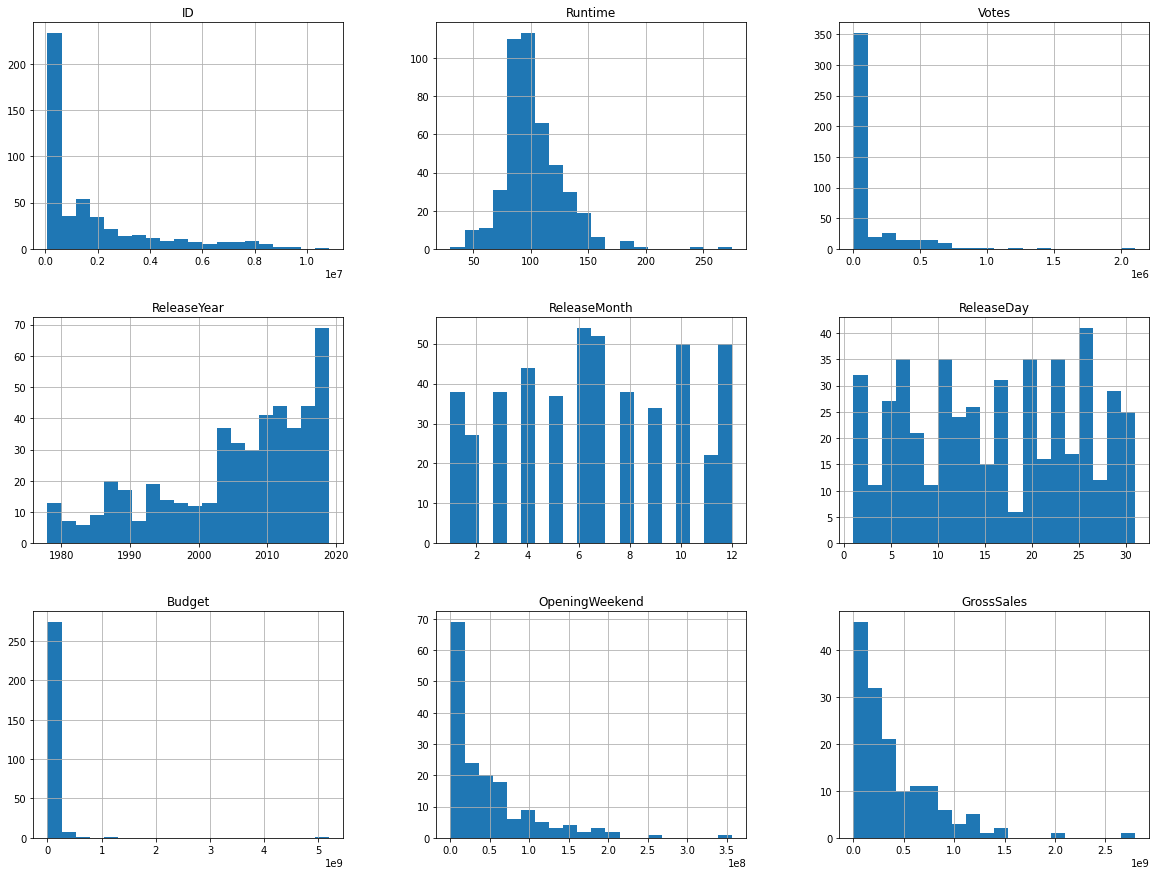

In [11]:
# distribution of Numerical variables 

movies.hist(bins=20,figsize=(20,15))

* In OpeningWeekend histogram, it is strongly right skewed and there's a cliff at 20 million dollars. 
* From ReleaseYear chart, there's overall increasing trend. The sharp increase is observed between 2002 and 2004, and between 2017 and 2019.
* The GrossSales is right skewed and it shows similar distribution to the OpeningWeekend plot.

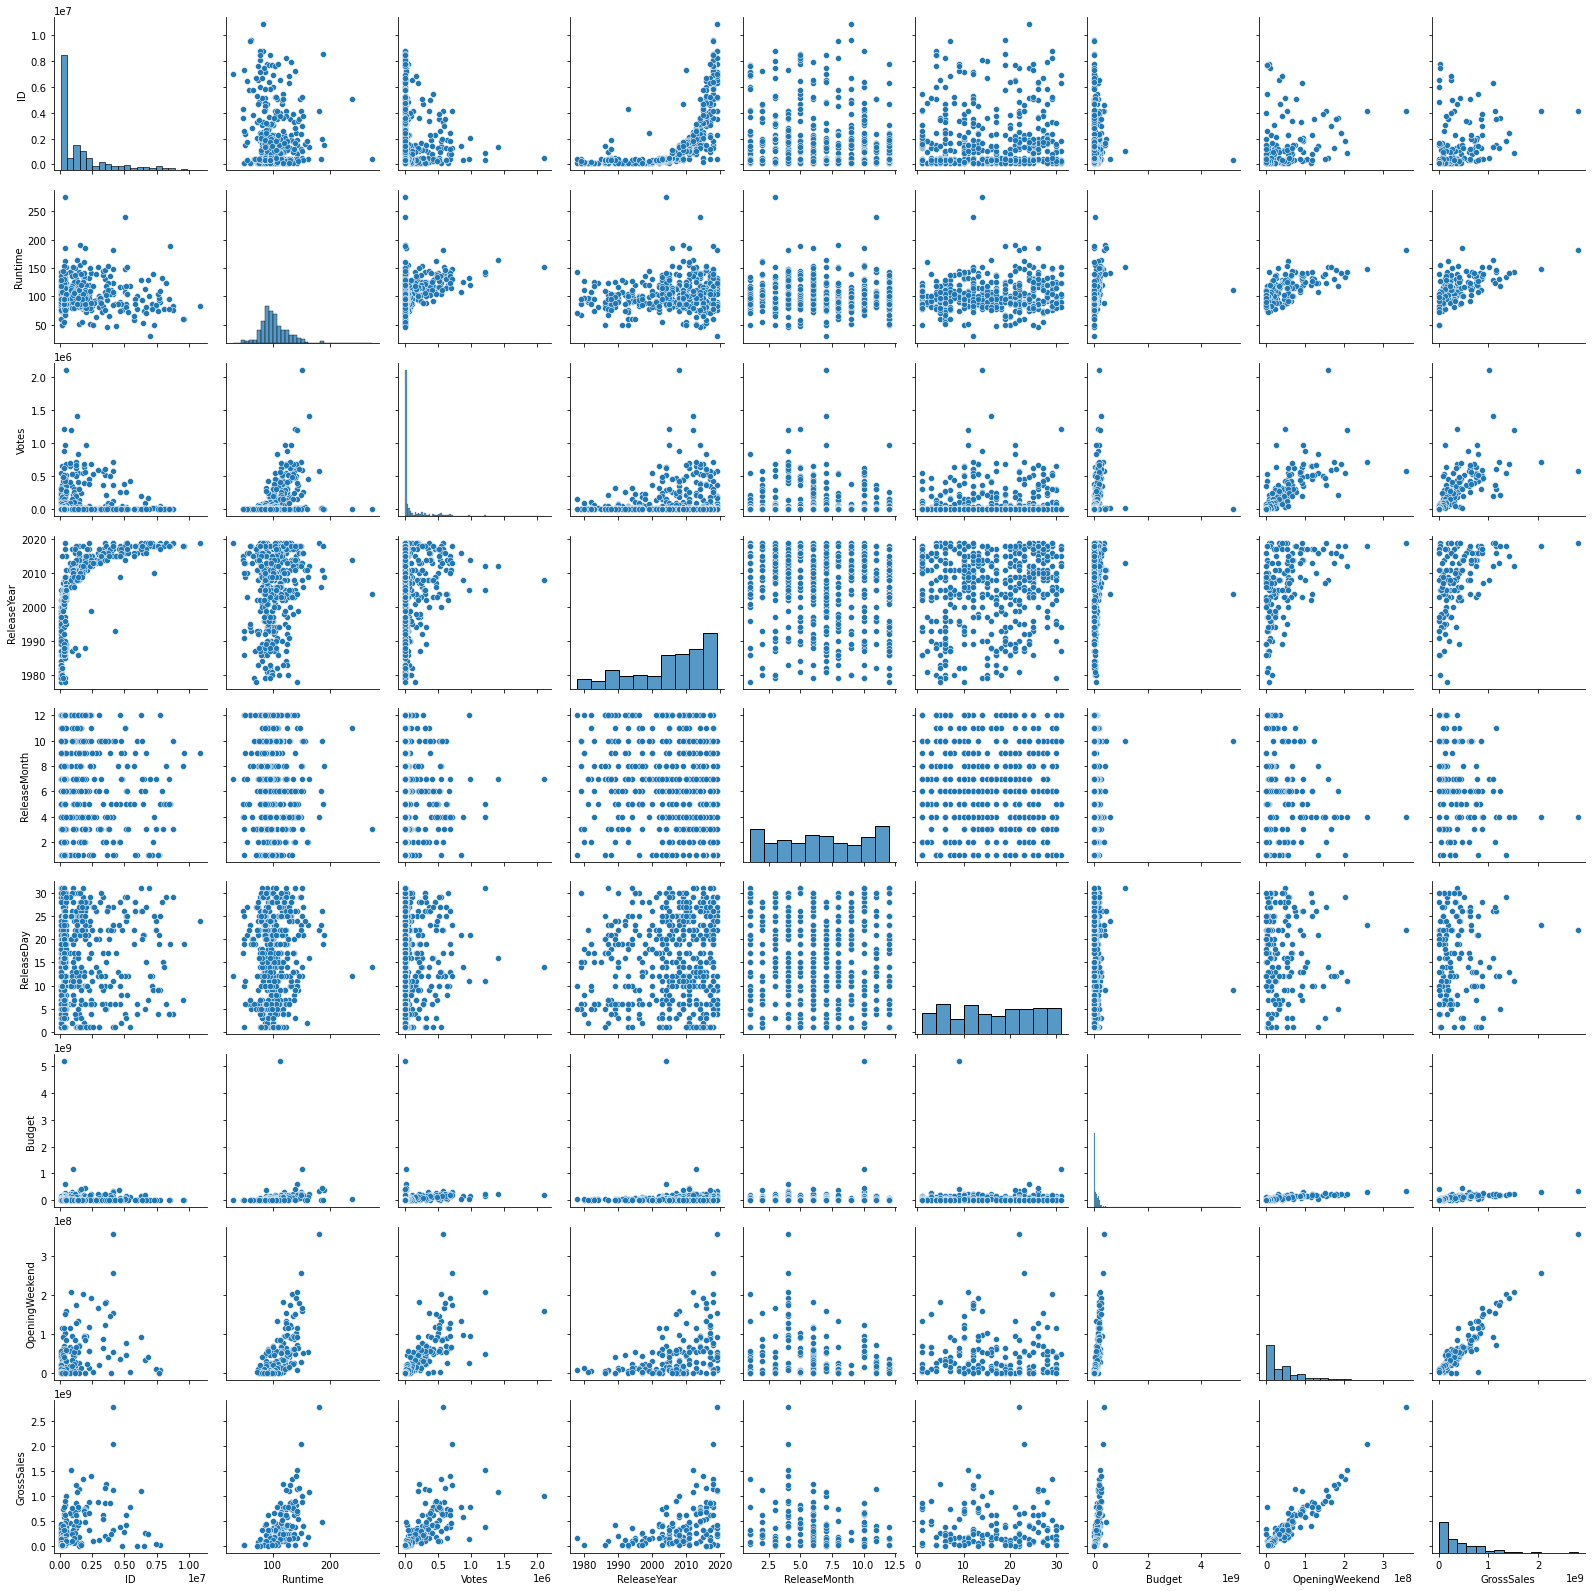

In [12]:
sns.pairplot(movies)

* There's clear positive linear relationship between OpeningWeekend and GrossSales.
* The graph between Opening weekend and Budget shows a linear relationship with lower slope.

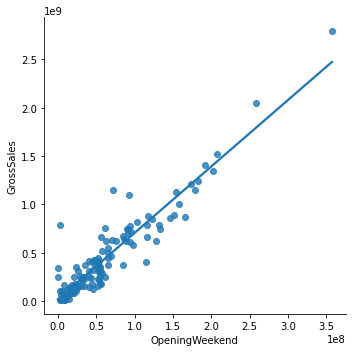

In [13]:
# using lmplot to draw a regression line to see the outliers.
sns.lmplot(x="OpeningWeekend", y="GrossSales", 
            ci = None,
            data = movies)


* There are a few outliers that might affect both results and assumptions.
* However, they are not likely to cause a strong association, I would keep this outliers for now.

In [14]:
# calculate the percentage of OpeningWeekend in GrossSales
# get a total OpeningWeekend and GrossSales 

total_opening= movies.OpeningWeekend.sum()
print("Total Opening Weekend Sales of superhero movies : %s" % total_opening)


total_sales= movies.GrossSales.sum()
print("Total Gross Sales of superhero movies : %s" % total_sales)

percent=total_opening/total_sales *100 
print("The percentage of Gross Sales earned in Opening Weekend : %s" % percent )

Total Opening Weekend Sales of superhero movies : 7962910662.0
Total Gross Sales of superhero movies : 60109610315.0
The percentage of Gross Sales earned in Opening Weekend : 13.247317060069017


In [15]:
# compute percentage of each format
# and add it as a column at the end of the table

percentage = []
for i in range(movies.shape[0]):
    pct = (movies.OpeningWeekend[i]/movies.GrossSales[i]) * 100
    percentage.append(round(pct,2))
    # display percentage

print(percentage)

# display data
movies['Percentage'] = percentage
display(movies)

[8.44, 12.77, 13.0, 15.77, 6.32, 9.42, 29.36, 14.69, 17.9, 12.58, nan, 13.6, 10.9, 15.27, 16.33, nan, 13.3, 0.34, nan, 9.84, 15.0, nan, 14.37, 14.28, nan, 12.18, 13.03, 16.85, 29.8, 34.61, 11.95, 28.77, 13.65, 12.56, 16.91, 18.0, 28.31, 38.07, 16.5, 17.46, 19.0, 14.7, 12.55, 13.61, 17.56, 16.96, 12.14, 15.53, 2.39, 18.38, 11.0, 11.16, 19.35, 6.58, 16.96, 15.58, 13.29, 19.63, 12.18, 14.63, 12.37, 4.88, 13.43, 8.49, nan, 14.33, 20.53, nan, 8.18, 11.0, 0.06, 12.92, nan, 22.8, 16.99, 15.29, 21.04, 11.02, nan, 14.78, 4.49, 12.89, 23.31, nan, 13.3, nan, 11.34, 14.3, 25.33, 10.03, 11.8, 12.8, 13.02, nan, 21.53, 8.55, nan, 24.19, 21.06, 16.94, 14.73, 31.96, nan, nan, nan, 22.74, 14.42, 12.87, nan, 11.21, 10.83, 25.13, nan, 0.07, 23.4, 8.46, nan, 8.27, 20.08, nan, nan, nan, nan, 13.29, 14.44, 12.46, 20.38, nan, 24.15, 17.48, 54.17, nan, nan, nan, 12.74, nan, nan, nan, nan, nan, 14.72, 13.02, 32.69, 14.82, nan, 11.47, nan, 13.05, nan, 21.43, nan, nan, nan, nan, nan, 17.03, 42.29, nan, nan, 16.29

,_id,ID,Title,Runtime,Rating,Votes,MPAARating,ReleaseYear,ReleaseMonth,ReleaseDay,...,Company1,Company2,Company3,Director2,Company4,Company5,Director3,Director4,Director5,Percentage
0,6287e2b55281db940f22083e,6320628,Spider-Man: Far from Home,129.0,7.7,200908.0,PG-13,2019,6,26,...,Columbia Pictures,Pascal Pictures,Marvel Studios,NaN,NaN,NaN,NaN,NaN,NaN,8.44
1,6287e2b55281db940f22083f,4154796,Avengers: Endgame,181.0,8.6,569782.0,PG-13,2019,4,22,...,Marvel Studios,NaN,NaN,Joe Russo,NaN,NaN,NaN,NaN,NaN,12.77
2,6287e2b55281db940f220840,6565702,Dark Phoenix,113.0,5.8,96585.0,PG-13,2019,6,5,...,Twentieth Century Fox,Bad Hat Harry Productions,Donners' Company,NaN,Kinberg Genre,Marvel Entertainment,NaN,NaN,NaN,13.00
3,6287e2b55281db940f220841,468569,The Dark Knight,152.0,9,2105721.0,TV-14::(LV),2008,7,14,...,Warner Bros.,Legendary Entertainment,Syncopy,NaN,DC Comics,NaN,NaN,NaN,NaN,15.77
4,6287e2b55281db940f220842,1477834,Aquaman,143.0,7,300580.0,PG-13,2018,11,26,...,DC Comics,DC Entertainment,Panoramic Pictures,NaN,Rodeo FX,The Safran Company,NaN,NaN,NaN,6.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,6287e2b55281db940f220a1d,1396235,Catalina: A New Kind of Superhero,98.0,3,14.0,Not Rated,2009,1,5,...,Water on the Rock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
480,6287e2b55281db940f220a1e,2597794,ACT Honour Walk,50.0,NaN,NaN,NaN,2013,1,1,...,Open Source University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
481,6287e2b55281db940f220a1f,4306404,Oigye Eseo on Ulemae 9: Mujeok Ui Paiteo Ulemae,NaN,NaN,NaN,NaN,1993,10,6,...,Seoul Donghwa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
482,6287e2b55281db940f220a20,5737002,Translyatsia Safronova: Pro Konstruktory,65.0,1.2,12.0,NaN,2015,8,19,...,Obzory igrushek Tovarisch Safronov,Obzor konstruktora,NaN,Konstantin Safronov,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# check statiscal value of percentage

movies.describe()

,ID,Runtime,Votes,ReleaseYear,ReleaseMonth,ReleaseDay,Budget,OpeningWeekend,GrossSales,Percentage
count,4.840000e+02,448.000000,4.590000e+02,484.000000,484.000000,484.000000,2.840000e+02,1.670000e+02,1.500000e+02,126.000000
mean,1.775352e+06,102.053571,1.104748e+05,2005.214876,6.626033,15.828512,9.266034e+07,4.768210e+07,4.007307e+08,17.452143
std,2.198794e+06,25.958007,2.292722e+05,10.896051,3.345932,8.853859,3.235704e+08,5.634090e+07,4.195273e+08,13.477473
min,7.747900e+04,30.000000,5.000000e+00,1978.000000,1.000000,1.000000,4.000000e+02,2.800000e+03,3.909100e+04,0.060000
25%,3.032585e+05,87.000000,1.220000e+02,1997.000000,4.000000,8.000000,2.475000e+06,8.031790e+06,1.008038e+08,12.392500
50%,8.543450e+05,98.000000,3.398000e+03,2008.000000,7.000000,16.000000,3.500000e+07,2.568574e+07,2.566071e+08,14.660000
75%,2.287986e+06,114.250000,9.330200e+04,2014.000000,10.000000,24.000000,1.200000e+08,6.380194e+07,6.217610e+08,19.262500
max,1.084403e+07,275.000000,2.105721e+06,2019.000000,12.000000,31.000000,5.200000e+09,3.571150e+08,2.796274e+09,130.470000


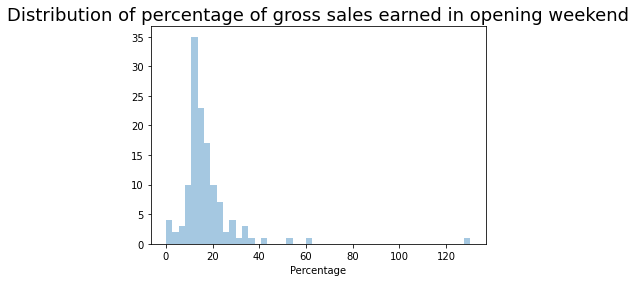

In [17]:
# check frequency and distribution of 
# Percentage of gross sales earned in opening weekend
sns.distplot(movies['Percentage'],kde = False)
plt.title("Distribution of percentage of gross sales earned in opening weekend",size = 18)
plt.show()

* 17 percent of gross sales earned in opening weekend has the highest frequency. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, '1978'),
  Text(1, 0, '1979'),
  Text(2, 0, '1980'),
  Text(3, 0, '1981'),
  Text(4, 0, '1982'),
  Text(5, 0, '1983'),
  Text(6, 0, '1984'),
  Text(7, 0, '1985'),
  Text(8, 0, '1986'),
  Text(9, 0, '1987'),
  Text(10, 0, '1988'),
  Text(11, 0, '1989'),
  Text(12, 0, '1990'),
  Text(13, 0, '1991'),
  Text(14, 0, '1992'),
  Text(15, 0, '1993'),
  Text(16, 0, '1994'),
  Text(17, 0, '1995'),
  Text(18, 0, '1996'),
  Text(19, 0, '1997'),
  Text(20, 0, '1998'),
  Text(21, 0, '1999'),
  Text(22, 0, '2000'),
  Text(23, 0, '2001'),
  Text(24, 0, '2002'),
  Text(25, 0, '2003'),
  Text(26, 0, '2004'),
  Text(27, 0, '2005'),
  Text(28, 0, '2006'),
  Text(29, 0, '2007'),
  Text(30, 0, '2008'),
  Text(31, 0, '2009'),
  Text(32, 0, '2010'),
  Text(33, 0, '2011'),
  Text(34, 0, '2012'),
  Text(35, 

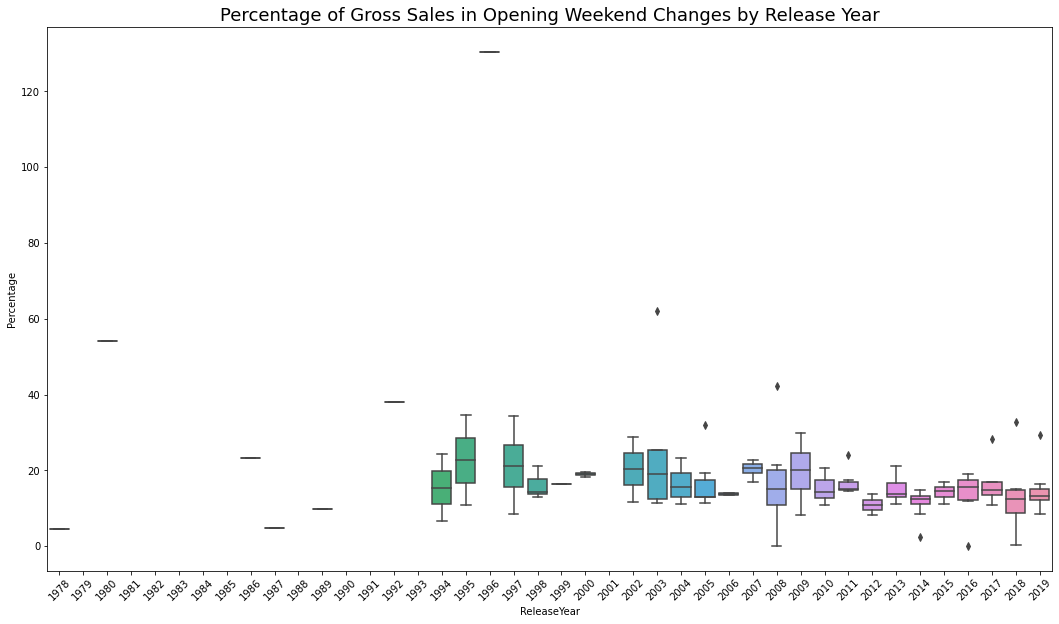

In [18]:
# let's see the changes of percentage of opening weekend sales in gross sales by ReleaseYear


plt.figure(figsize=(18,10))
sns.boxplot(x='ReleaseYear',y='Percentage',data=movies)
plt.title("Percentage of Gross Sales in Opening Weekend Changes by Release Year", size = 18)
# rotate label text in the plot
plt.xticks(rotation=45)

* After the year of 1994, the percentage of gross sales earned in opening weekend sales has been taken significantly.

3      15.77
7      14.69
10       NaN
13     15.27
18       NaN
19      9.84
26     13.03
28     29.80
29     34.61
33     12.56
35     18.00
37     38.07
39     17.46
40     19.00
52     19.35
60     12.37
62     13.43
81     12.89
86     11.34
97     24.19
100    14.73
104      NaN
126    20.38
163    21.25
Name: Percentage, dtype: float64


Text(0.5, 1.0, 'Warner Bros.Percentage of Gross Sales during Opening Weekend')

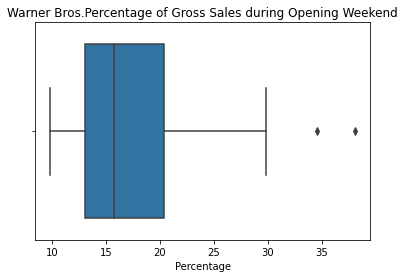

In [19]:
# the most frequency in company1 was Warner Bros. 
# check the percentage of gross sales earned during opening weekend of Warner Bros.
warner = movies.loc[movies['Company1']=='Warner Bros.','Percentage']
print(warner)
# check the mean percentage 
sns.boxplot(warner)
plt.title("Warner Bros.Percentage of Gross Sales during Opening Weekend",size=12) 

* Warner Bros. movie has the highest 38% of gross sales earned in opening weekend and lowest 9.84%.
* The average percentage is about 18%, which is higher than average percentage of gross sales earned during opening weekend.

17      0.34
23     14.28
30     11.95
34     16.91
44     17.56
46     12.14
55     15.58
59     14.63
66     20.53
68      8.18
91     12.80
165      NaN
Name: Percentage, dtype: float64


Text(0.5, 1.0, 'Marvel Entertainment.Percentage of Gross Sales during Opening Weekend')

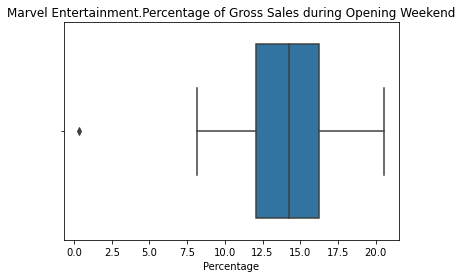

In [20]:
# the most frequency in company2 was Marvel Entertainment
# check the percentage of gross sales earned during opening weekend of Warner Bros.
marvel=movies.loc[movies['Company2']=='Marvel Entertainment','Percentage']
print(marvel)
# check mean percentage 
sns.boxplot(marvel)
plt.title("Marvel Entertainment.Percentage of Gross Sales during Opening Weekend",size=12)

* Marvel Entertainment movie has the highest 20.53% of gross sales earned in opening weekend and lowest 0.34%.
* The average percentage is about 13.2%.

Text(0.5, 1.0, 'Gross Sales vs Budget')

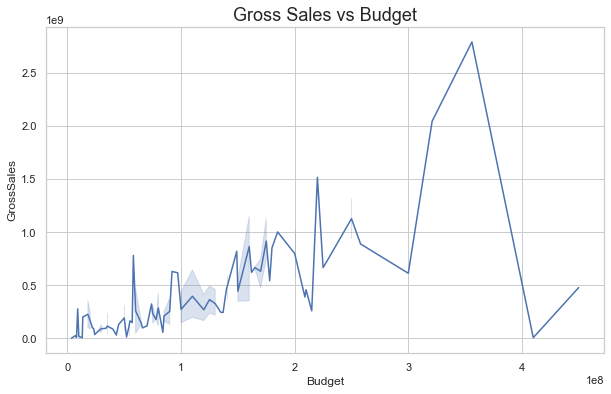

In [21]:
# Check the relationship the budget with Gross sales.

plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
b=sns.lineplot(x="Budget", y="GrossSales",data = movies)
plt.title('Gross Sales vs Budget',size=18)


* It shows mostly positive relationship between budget and grosssales.
* As the budget increases, the gross sales increases.
* The gross sales, however, sharply drops after $350,000,000 of the budget.

Text(0.5, 1.0, 'Opening Weekend Sales vs Budget')

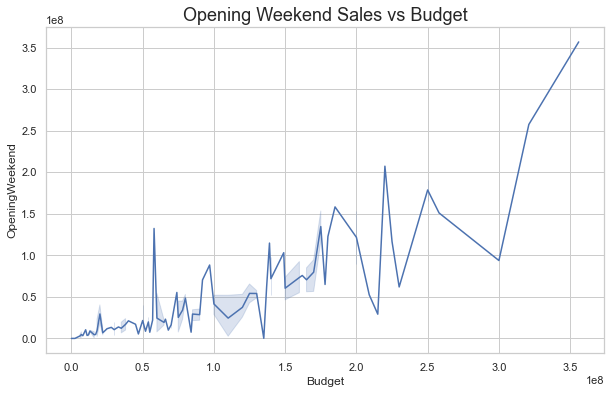

In [22]:
# Check the relationship the budget with opening weekend sales.

plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
sns.lineplot(x="Budget", y="OpeningWeekend",data = movies)
plt.title( 'Opening Weekend Sales vs Budget',size=18)


* There's a positive correlation observed.
* As budget increases, the opening weekend sales increases. 
* I assume the sharp increase the budget greater than $300,000,000 is caused by the outlier.

<Figure size 1440x1440 with 0 Axes>

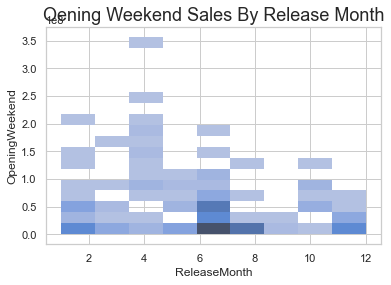

<Figure size 1440x1440 with 0 Axes>

In [23]:
# check the relationship opening weekend sales and release month
sns.histplot(data=movies, x="ReleaseMonth",y="OpeningWeekend")
plt.title('Oening Weekend Sales By Release Month',size = 18)
plt.figure(figsize=(20,20))


* April shows the highest gross sales followed by Jan-Feb, Jun-Jul, October.
* September has the lowest opening weekend sales.


## Conclusion

From the results, the data of opening weekend sales can be divided before and after 1993. In the early 1990s, box-office revenues had dipped considerably, due in part to the American economic recession of 1991, but then picked up again by 1993 and continued to increase. The superhero movies also show this trend. The opening weekend sales have a strong positive relationship with gross sales of superhero movies. The sum of opening weekend sales takes 13.25% of the sum of gross sales, and the mean of opening sales takes 17.45% of the total sales.  There's another positive relationship observed between budget and gross sales. When the budget increases, the gross sales increases, however, when the budget reached  $350,000,000, the gross sales amount dropped sharply. The company most superhero movie made in the data was the Warner Bros., and it was examined to see if their movie had higher percentage of gross sales earned during opening weekend.The statistical result shows their movies made about 1 percent higher opening weekend sales than the average percentage. Marvel Entertainment from company2, however, shows less than the average percentage, so I don't find any impressive relationship between movie company and opening weekend sales. For the release month, April has the highest opening weekend sales and September has the lowest. 

Since I didn't have other movie information to compare if superhero movies have higher percentage of gross sales earned during opening weekend than other genres, it would be a great task to do for the following analysis. Also, there were several outliers in the data and the analysis was conducted without removing outliers. The next analysis would consider to remove them and see if it makes different result. The result shows that opening weekend ticket sales are a strong predictor of a film's overall financial success since it takes average a quarter of gross sales.The data analysis would be more accurate if there was the pure profit information instead of gross sales. I assume that the percentage of gross sales earned in opening weekend would be greater than what I calculated.  Therefore, the movie companies should consider the factors which affect the opening weekend sales to plan their marketing strategy such as additional advertisement 72 hours prior to the release date.To consider the relasing month, April would be favorable while September should be the least considered. Also,the movie with higher budget up to  $350,000,000 could expect the higher earnings. If a good amount of budget is allocated to the opening weekend marketing and advertising, it is more likely to contribute to gross sales. 

## Citation

I'd like to thank to Professor Spence, who is my instrutor for DA320, for the great feedback and encouragement. I carefully examined his comment and advice, then applied them to the project. He also provided wonderful references that how to create a good notebook on his blog which gave me useful ideas to help me finish the project with lots of accomplishment. Also, I'd like to shout out to my classmates who provided me a good feedback.
Here is the website I referred:
* information about movie revenue: https://www.investopedia.com/articles/investing/093015/how-exactly-do-movies-make-money.asp
* seaborn chart codes : https://www.geeksforgeeks.org/plotting-graph-using-seaborn-python/ , https://seaborn.pydata.org/generated/seaborn.histplot.html
* seaborn color palette codes :https://www.tutorialspoint.com/seaborn/seaborn_quick_guide.htm#:~:text=Seaborn%20-%20Histogram.%20Histograms%20represent%20the%20data%20distribution,have%20used%20few%20datasets%20in%20our%20previous%20chapters